In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

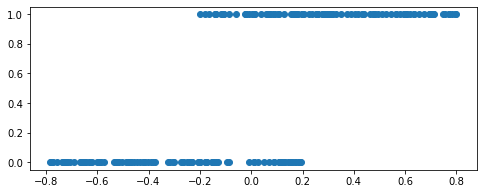

In [29]:
import statsmodels.api as sm

pos_samples = 100
neg_samples = 100
X = np.concatenate((-np.random.rand(pos_samples)+0.2,np.random.rand(pos_samples)-0.2))
y = np.concatenate((np.zeros(neg_samples), np.ones(pos_samples)))

plt.figure(figsize=(8,3))
plt.scatter(X,y)

In [30]:
import math

math.e

2.718281828459045

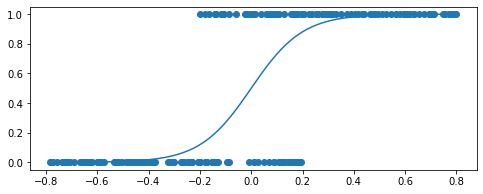

In [34]:
domain = np.arange(np.min(X), np.max(X), step=0.01)
sigmoid = 1/(1+math.e**(-10*domain))

plt.figure(figsize=(8,3))
plt.scatter(X,y)
plt.plot(domain, sigmoid)

100%|██████████████████████████████████████| 999/999 [00:00<00:00, 12399.86it/s]

[6.50280926 3.54600029]
[[6.64019863]
 [3.17390836]]


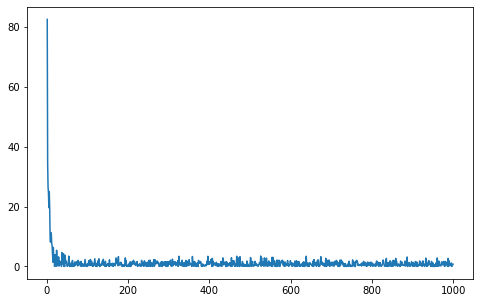

In [123]:
from tqdm import tqdm
import math

X_const = sm.add_constant(X)
y = y

beta = np.zeros(X_const.shape[1])
beta_star = np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@y


loss_values = []

time_steps = np.arange(1,int(1e3))
for t in tqdm(time_steps):
    selected = np.random.randint(0,X.shape[0])
    x = X[selected]
    y_true = y[selected]
    y_hat = np.dot(beta, x)
    loss_values.append((y_true-y_hat)**2)
    
    eta = 0.08/math.sqrt(t)
    g = -2*(y_true-y_hat)*x
    beta -= eta*g

print(beta)
print(beta_star)
plt.figure(figsize=(8,5))
plt.plot(time_steps, loss_values)


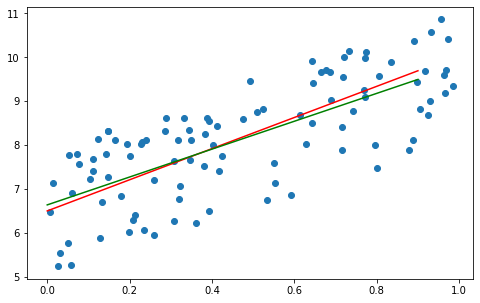

In [124]:
plt.figure(figsize=(8,5))
plt.scatter(X[:, 1],y)

domain = np.arange(1, step=0.1)
plt.plot(domain, beta[0]+beta[1]*domain, color="red")
plt.plot(domain, beta_star[0]+beta_star[1]*domain, color="green")

100%|███████████████████████████████████████| 999/999 [00:00<00:00, 8193.43it/s]

Predicted: [[6.61695158]
 [3.23764054]]
Best Possible: [[6.64019863]
 [3.17390836]]


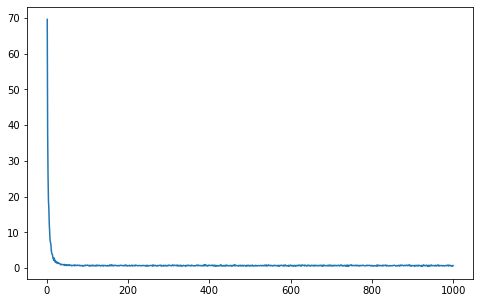

In [125]:
from tqdm import tqdm
import math

beta = np.zeros((X.shape[1],1))
beta_star = np.linalg.inv(np.transpose(X)@X)@np.transpose(X)@y


loss_values = []
batch_size = X.shape[0]

time_steps = np.arange(1,int(1e3))
for t in tqdm(time_steps):
    selected = np.random.randint(low=0,high=X.shape[0],size=batch_size)
    x = X[selected]
    y_true = y[selected]
    y_hat = np.dot(x, beta)
    MSE = np.mean((y_true-y_hat)**2)
    loss_values.append(MSE)
    
    eta = 0.1/math.sqrt(t)
    g = np.transpose(np.mean(2*(y_true-y_hat)*(-x), axis=0, keepdims=True))
    test = eta*g
    beta -= eta*g

print("Predicted:", beta)
print("Best Possible:", beta_star)
plt.figure(figsize=(8,5))
plt.plot(time_steps, loss_values)


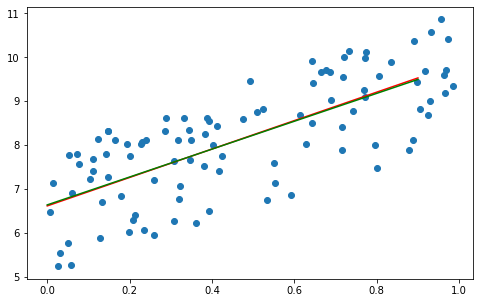

In [126]:
plt.figure(figsize=(8,5))
plt.scatter(X[:, 1],y)

domain = np.arange(1, step=0.1)
plt.plot(domain, beta[0]+beta[1]*domain, color="red")
plt.plot(domain, beta_star[0]+beta_star[1]*domain, color="green")